Email Spam Classification Ml problem

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('spam.csv',encoding="ISO-8859-1")

In [9]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1991,ham,No other Valentines huh? The proof is on your ...,NaN,NaN,NaN
4720,ham,"Yup. Anything lor, if u dun wan it's ok...",NaN,NaN,NaN
5046,ham,Hmmm.still we dont have opener?,NaN,NaN,NaN
4548,ham,"Haha, my friend tyler literally just asked if ...",NaN,NaN,NaN
1822,ham,If you're thinking of lifting me one then no.,NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

**1. DATA CLEANING**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [12]:
df=df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)

In [13]:
df.sample(5)

,v1,v2
830,spam,U have a secret admirer. REVEAL who thinks U R...
580,ham,Huh so early.. Then Ì_ having dinner outside i...
3382,ham,K... Must book a not huh? so going for yoga ba...
1417,ham,No wonder... Cos i dun rem seeing a silver car...
2641,spam,"You are guaranteed the latest Nokia Phone, a 4..."


Renaming columns

In [21]:
df=df.rename(columns={'v1':'target','v2':'text'})

In [22]:
df.sample(5)

,target,text
2278,ham,Hmm...Bad news...Hype park plaza $700 studio t...
3075,ham,"Mum, hope you are having a great day. Hoping t..."
496,ham,Nope... Think i will go for it on monday... So...
1262,spam,"Hungry gay guys feeling hungry and up 4 it, no..."
1637,spam,"0A$NETWORKS allow companies to bill for SMS, s..."


In [23]:
df['target'].unique()

array(['ham', 'spam'], dtype=object)

In [24]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['target']= label_encoder.fit_transform(df['target'])

df['target'].unique()

array([0, 1])

checking null values

In [26]:
df.isnull().sum()

target    0
text      0
dtype: int64

checking for duplicate values

In [27]:
df.duplicated().sum()

403

In [28]:
df=df.drop_duplicates(keep='first')

In [29]:
df.shape

(5169, 2)

 **EDA - Text Data**

In [31]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

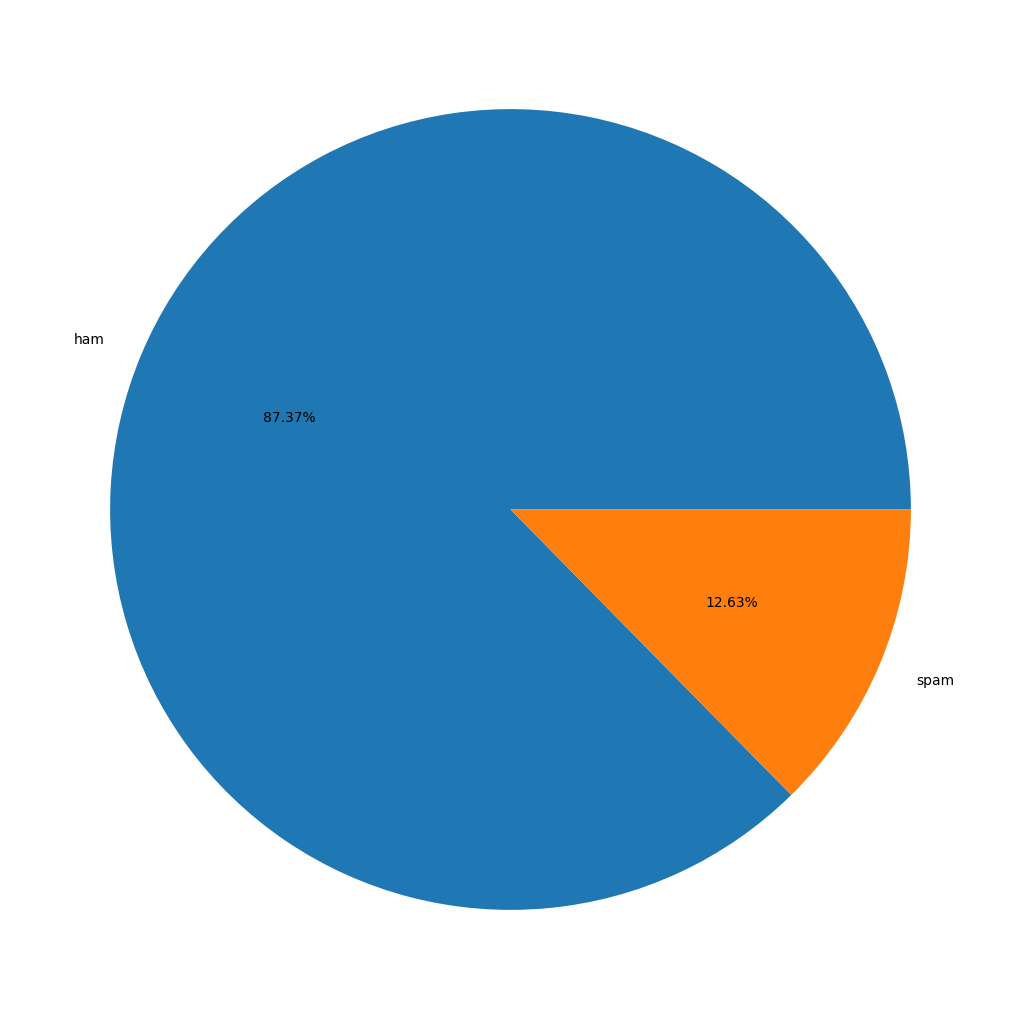

In [36]:
plt.figure(figsize=(13,13))
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%1.2f%%')
plt.show()

Data is imbalanced hence we need to do undersampling

Analaysing Text Data

In [39]:
import nltk

In [38]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [42]:
 df['num_characters']=df['text'].apply(len)

counting number of words

In [43]:
df['num_of_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [44]:
df.head()

,target,text,num_characters,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


number of sentences

In [46]:
df['num_of_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df['num_of_sentences']

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: num_of_sentences, Length: 5169, dtype: int64

In [47]:
df.sample(5)

,target,text,num_characters,num_of_words,num_of_sentences
137,0,No no. I will check all rooms befor activities,46,10,2
3082,0,K..k:)how about your training process?,38,11,1
4116,0,Sure thing big man. i have hockey elections at...,94,20,2
4283,0,Yes. I come to nyc for audiitions and am tryin...,60,14,2
1610,0,I'll probably be around mu a lot,32,8,1


In [49]:
df.iloc[:,1:].describe()

,num_characters,num_of_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [52]:
#HAM
df[df['target']==0].iloc[:,1:].describe()

,num_characters,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [53]:
#SPAM
df[df['target']==1].iloc[:,1:].describe()

,num_characters,num_of_words,num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

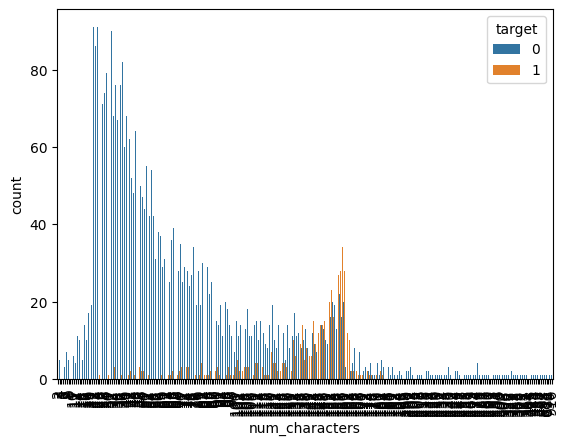

In [57]:
sns.countplot(x='num_characters',hue='target',data=df)
plt.xticks(rotation=90)

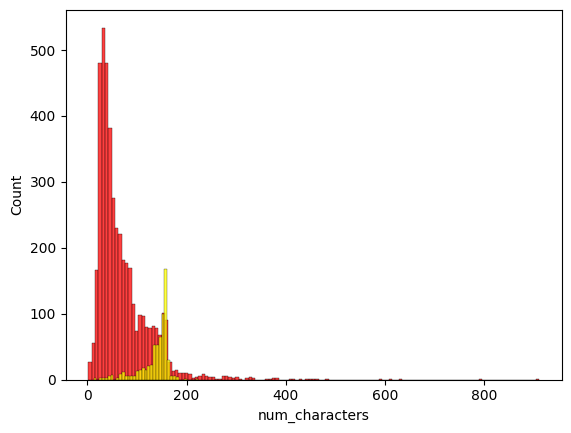

In [58]:
sns.histplot(df[df['target']==0]['num_characters'],color='red')
sns.histplot(df[df['target']==1]['num_characters'],color='yellow')
plt.show()

<Axes: xlabel='num_of_words', ylabel='Count'>

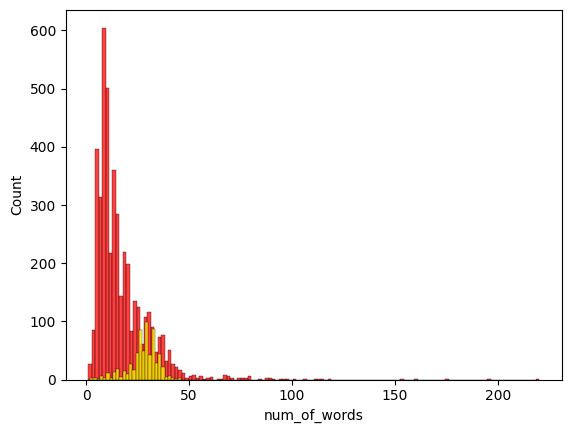

In [59]:
sns.histplot(df[df['target']==0]['num_of_words'],color='red')
sns.histplot(df[df['target']==1]['num_of_words'],color='yellow')

<Axes: xlabel='num_of_sentences', ylabel='Count'>

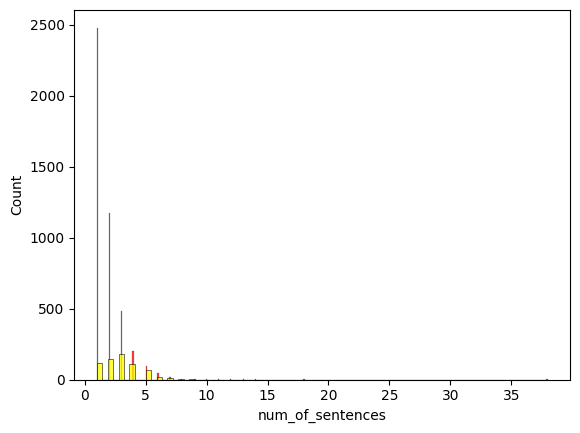

In [60]:
sns.histplot(df[df['target']==0]['num_of_sentences'],color='red')
sns.histplot(df[df['target']==1]['num_of_sentences'],color='yellow')

<ipython-input-62-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

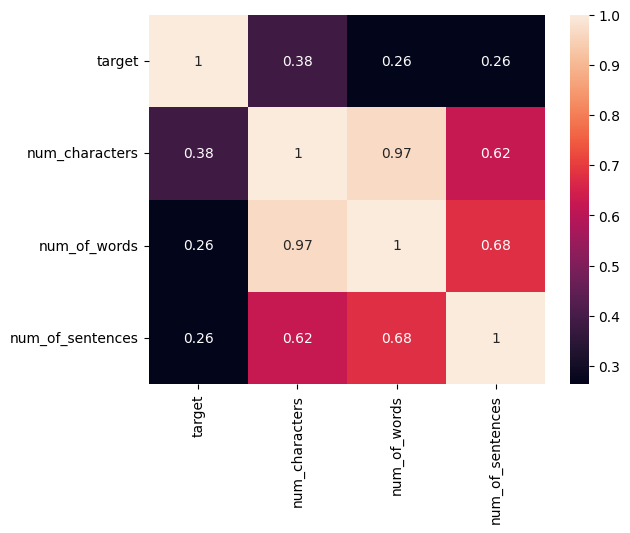

In [62]:
sns.heatmap(df.corr(),annot=True)

#DATA PREPROCESSING
1.Lower Case
2.Tokenisation
3.Removing special characters
4.Removing Stop words and punctuation
5.Stemming

In [66]:
import nltk
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [64]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [75]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  v=[]
  for i in text:
    if i.isalnum():
      v.append(i)

  text = v[:]
  v.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      v.append(i)

  text = v[:]
  v.clear()
  for i in text:
    v.append(ps.stem(i))

  return " ".join(v)


In [76]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [78]:
df['transformed_text']=df['text'].apply(transform_text)

In [79]:
from wordcloud import WordCloud

In [85]:
wc=WordCloud(width=500,height=500,min_font_size=15,background_color='white')

In [86]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))

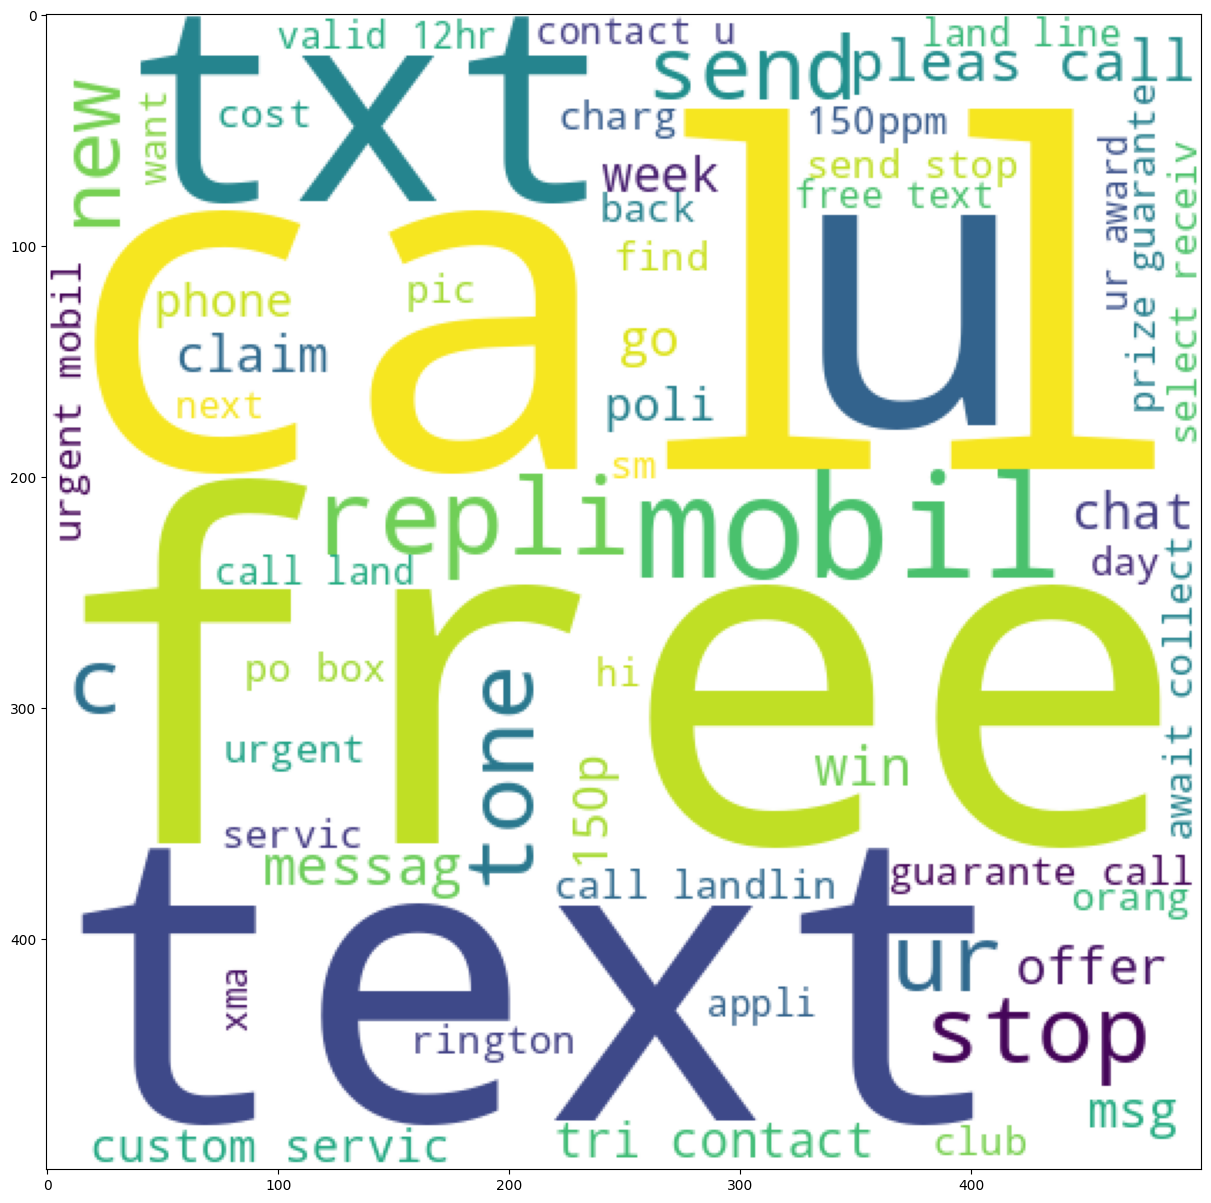

In [87]:
plt.figure(figsize=(15,15))
plt.imshow(spam_wc)

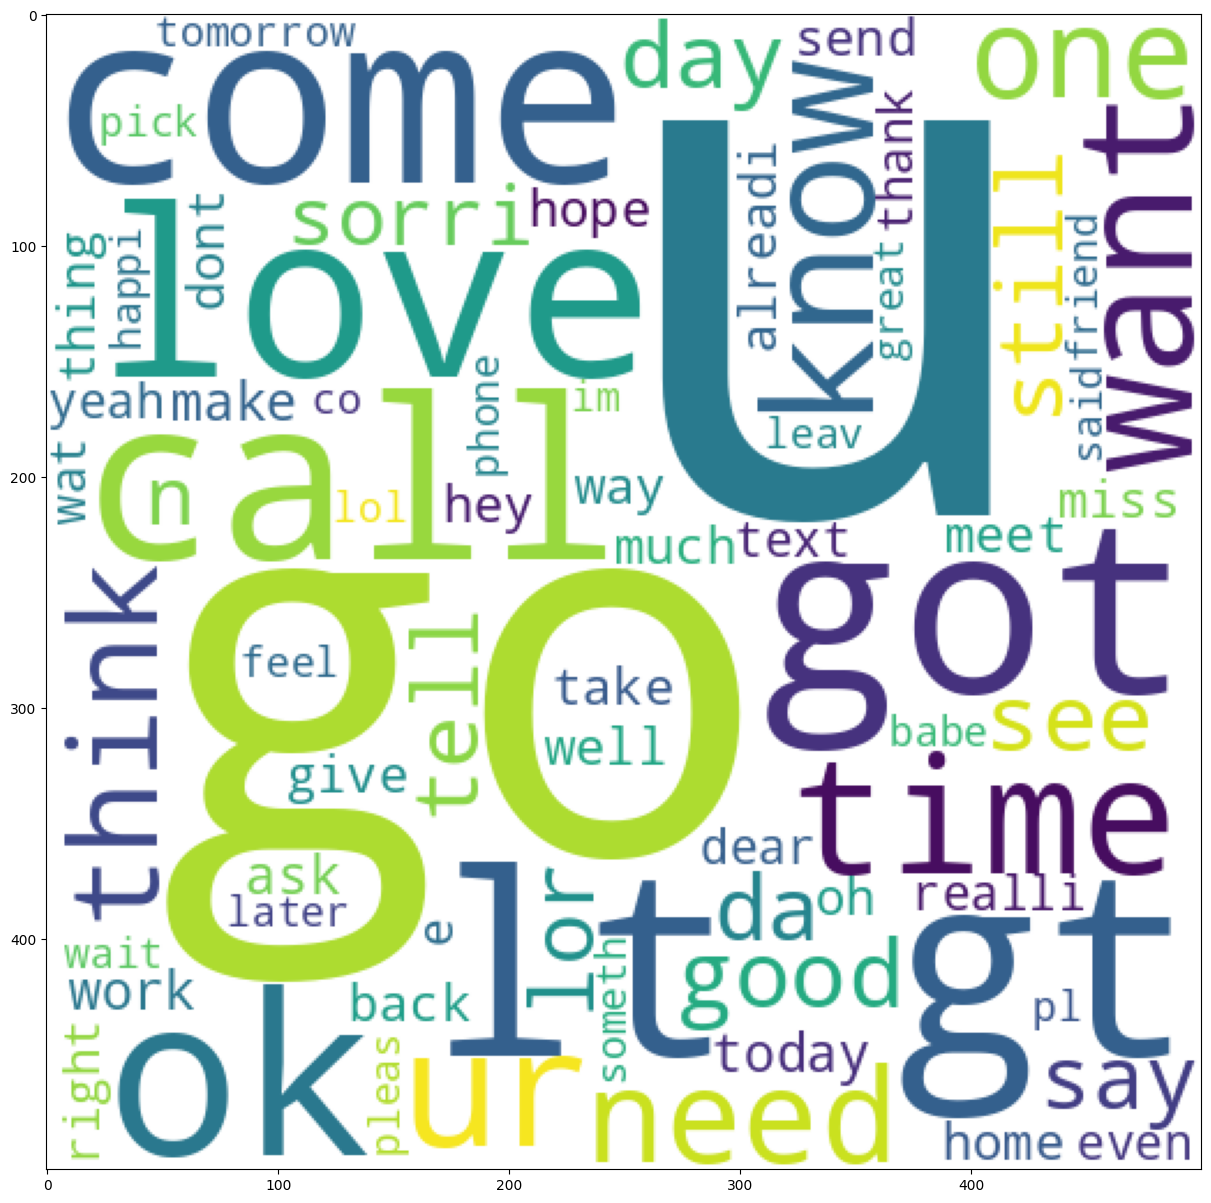

In [89]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(15,15))
plt.imshow(ham_wc)

Top 30 words

In [90]:
df[df['target']==1]['transformed_text'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [91]:
spam=[]
for m in df[df['target']==1]['transformed_text'].tolist():
  for w in m.split():
    spam.append(w)

In [93]:
len(spam)

9939

In [95]:
from collections import Counter
Counter(spam).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [103]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
from collections import Counter
Counter(spam_corpus)
Counter(spam_corpus).most_common(30)
plt.figure(figsize=(18,12))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

TypeError: ignored

<Figure size 1800x1200 with 0 Axes>

MODEL BUILDING

In [110]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [115]:
X=cv.fit_transform(df['transformed_text']).toarray()
y=df['target'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [113]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [119]:
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [121]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [122]:
bnb.fit(X_train,y_train)
y_pred2 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283
